In [76]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Ejercicio de síntesis taller 2

# Ejercicio 1:

El objetivo de este ejercicio es poner en cero (NEGRO) las regiones que no pertenecen a las bujías (FONDO DE LA IMAGEN), mejorando al mismo tiempo el contraste de los objetos mismos (INTERIOR DE LAS BUJÍAS). Se puede utilizar CUALQUIERA de las operaciones vistas hasta el momento (operaciones aritméticas, lógicas, transformaciones del histograma, umbralización).

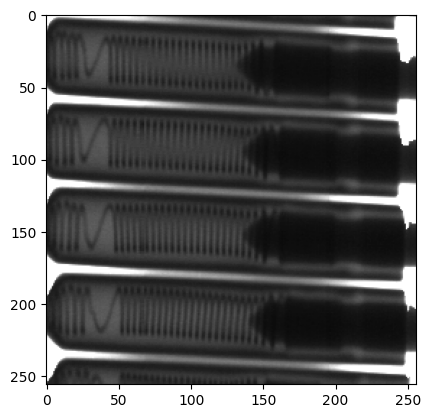

In [77]:
bougies = cv2.imread("./images/BOUGIES.png")
bougies = cv2.cvtColor(bougies, cv2.COLOR_BGR2GRAY)

plt.imshow(bougies, cmap= 'gray', vmin = 0, vmax= 255)

plt.show()

Como se puede apreciar el fondo es de un color más claro (excepto por un color grisaseo en los centros de las instersecciones) que las bujias, por lo que se realizará una umbralización para separar las bujias y el fondo.

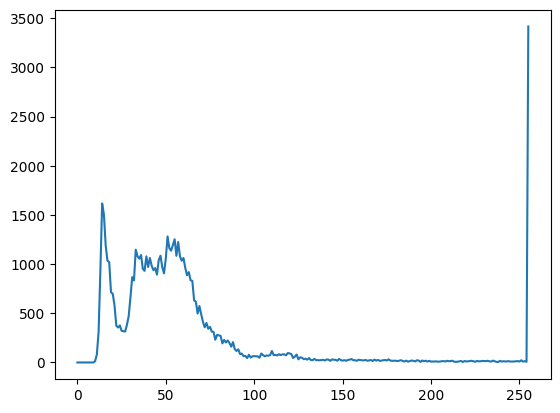

In [78]:
hist = cv2.calcHist([bougies],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

Como se puede apreciar las bujías empiezan aproximadamente en el color 100, por lo que se define una división para separan el fondo de las bujias

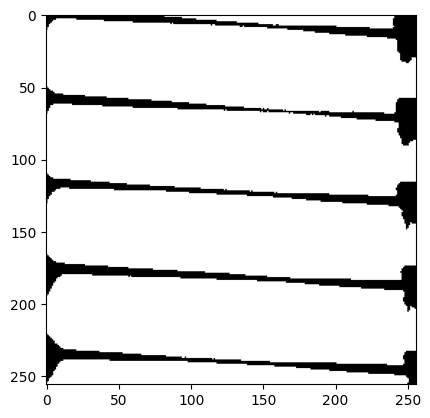

In [79]:
division_bujias_fondo = 100
thres_value, thres_bougies_1 = cv2.threshold(bougies, division_bujias_fondo, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thres_bougies_1, cmap= 'gray', vmin = 0, vmax= 255)
plt.show() 

Como se puede observar, se logra una muy buena división entre el fondo y las bujias, por lo que en la imagen final se pintarán de negro los pixeles que sean negros en la imagen thres_bougies_1

Para mejorar el contraste dentro de las bujías se realiza una ecualización del histograma.

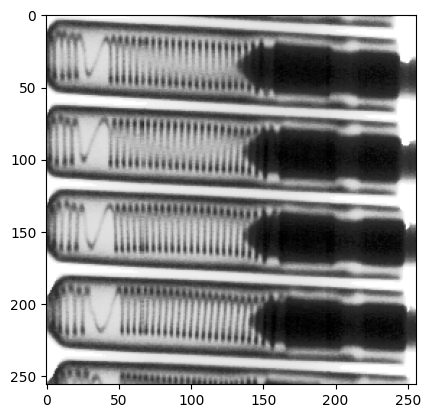

In [80]:
bougies_equ = cv2.equalizeHist(bougies)
plt.imshow(bougies_equ, cmap= 'gray', vmin = 0, vmax= 255)
plt.show() 

Tras obtener la mejora de contraste, se edita esta foto para agregar los pixeles negros en el fondo.

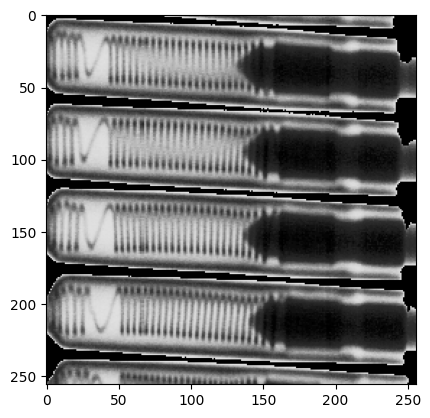

In [81]:
bougies_equ = cv2.bitwise_and(bougies_equ, thres_bougies_1)
plt.imshow(bougies_equ, cmap= 'gray', vmin = 0, vmax= 255)
plt.show() 

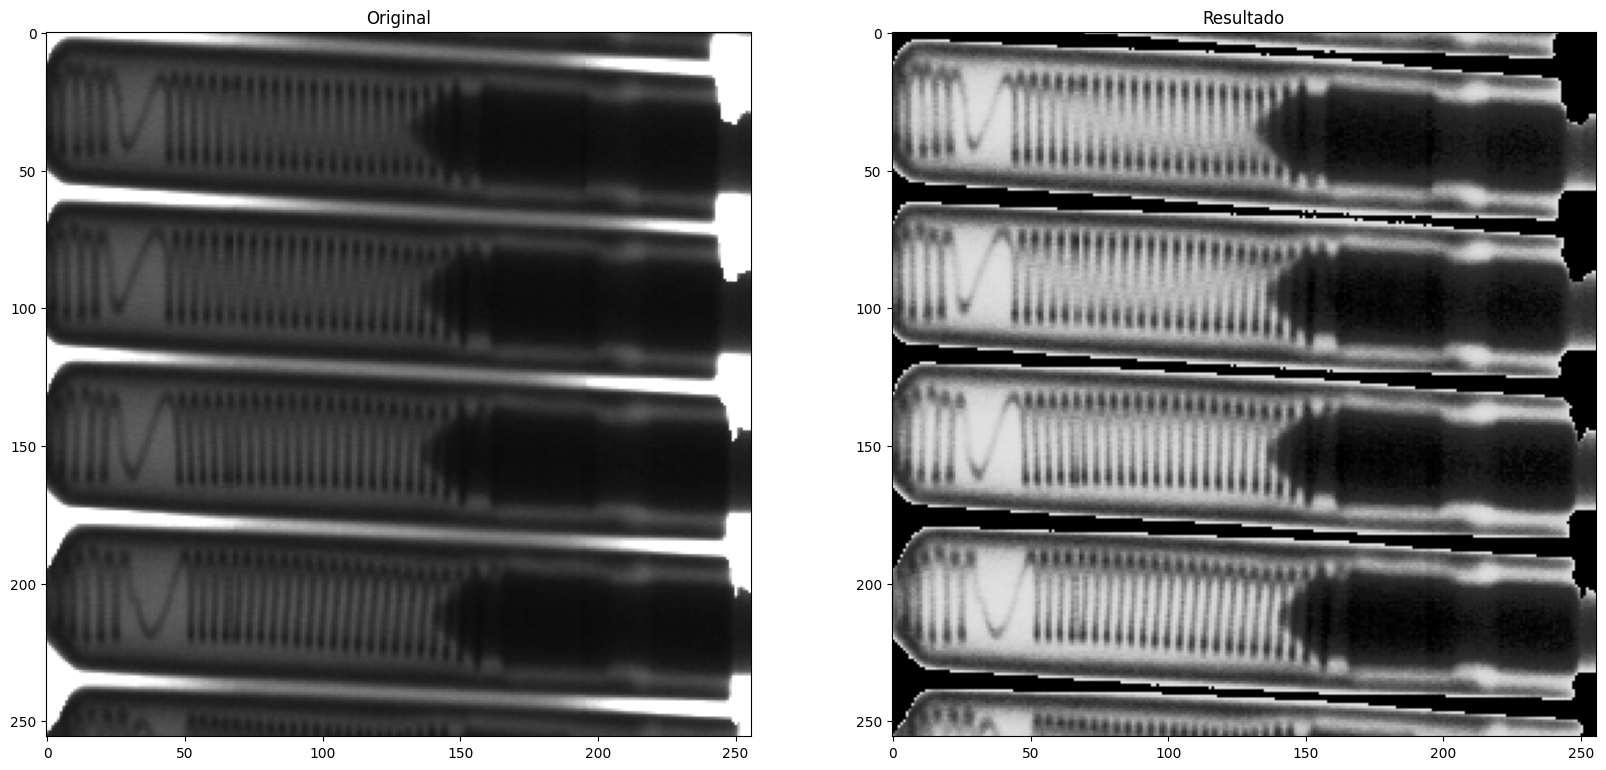

In [82]:
fig, axes = plt.subplots(1,2, figsize = (20,15)) 
axes[0].imshow(bougies, cmap= 'gray', vmin = 0, vmax= 255)
axes[0].set_title('Original')
axes[1].imshow(bougies_equ, cmap= 'gray', vmin = 0, vmax= 255)
axes[1].set_title('Resultado')
plt.show()

# Ejercicio 2:

Repita el ejercicio de síntesis del taller 1, pero esta vez utilizando la umbralización.

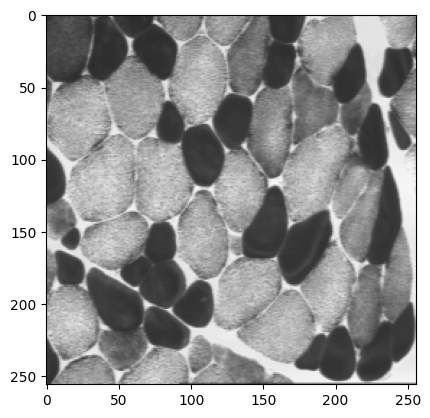

In [83]:
muscle = cv2.imread("./images/muscle.png")
muscle = cv2.cvtColor(muscle, cv2.COLOR_BGR2GRAY)

plt.imshow(muscle, cmap= 'gray', vmin = 0, vmax= 255)

plt.show()

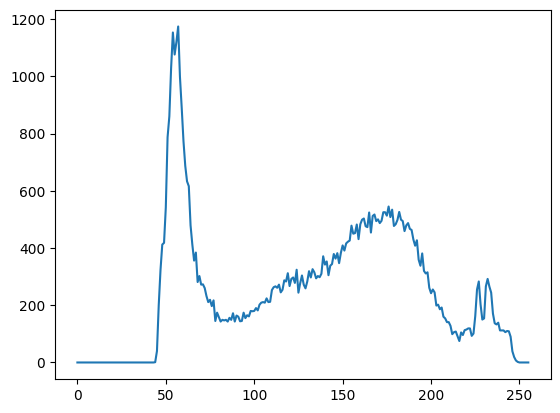

In [84]:
hist_exp = cv2.calcHist([muscle], [0], None, [256], [0, 256])
plt.plot(hist_exp)
plt.show()

Se puede apreciar que el color oscuro va hasta aproximadamente el color 90. Es por esto que se utiliza este valor para la transformación.

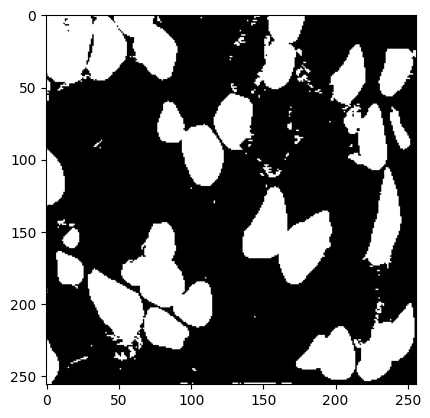

In [85]:
T = 90

_, sintesis = cv2.threshold(muscle, T, 255, cv2.THRESH_BINARY_INV)

plt.imshow(sintesis, cmap= 'gray', vmin = 0, vmax= 255)

plt.show()

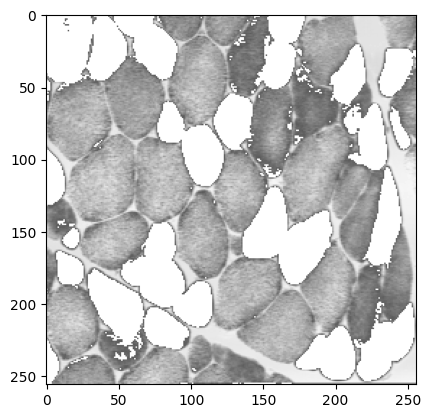

In [86]:
resultado = muscle.copy()
resultado = cv2.bitwise_or(resultado, sintesis)

plt.imshow(resultado, cmap= 'gray', vmin = 0, vmax= 255)

plt.show()

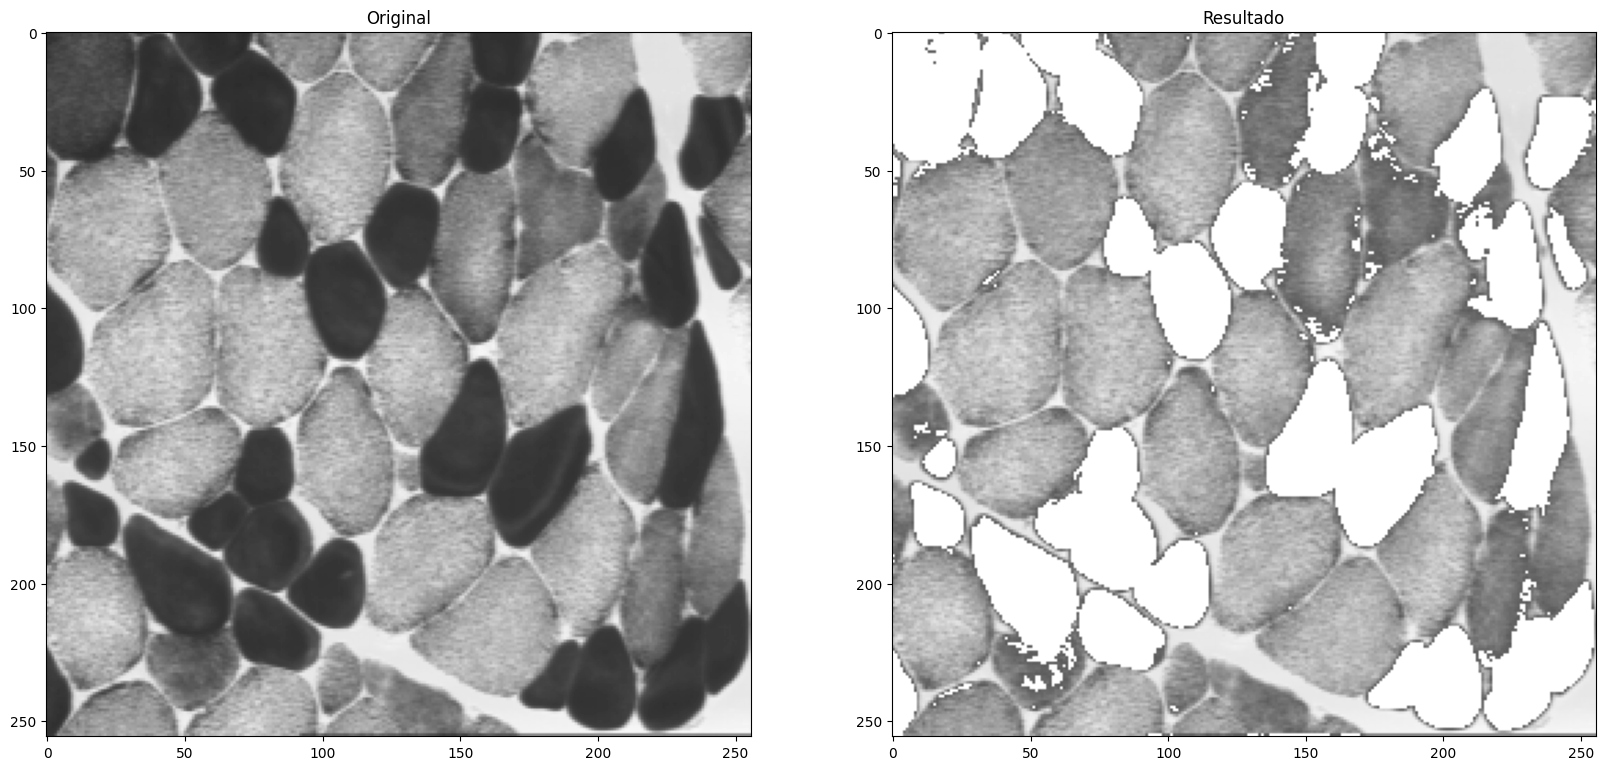

In [87]:
fig, axes = plt.subplots(1,2, figsize = (20,15)) 
axes[0].imshow(muscle, cmap= 'gray', vmin = 0, vmax= 255)
axes[0].set_title('Original')
axes[1].imshow(resultado, cmap= 'gray', vmin = 0, vmax= 255)
axes[1].set_title('Resultado')
plt.show()